In [1]:
# import packages
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import yaml
import math
#from larndsim import consts, fee
from collections import defaultdict
from uncertainties import ufloat
import time
import logging

In [3]:
# load pixel xy position dictionary from module0_flow. Note: I edited the fxn to have a return at the end.
# obviously, requires module0_flow to run (ideally this will be in larpix-geometry at some point)
from module0_flow.resources import geometry
geometry_file = "pixel_layouts/single_tile_layout-2.0.1.yaml"
geom = geometry.Geometry(classname='Geometry',data_manager=None,crs_geometry_file=geometry_file)
pixel_xy = geom._load_charge_geometry()

create Geometry()


In [26]:
folder = '/Users/samuelfogarty/OneDrive/Desktop/OneDrive/mod0reco/CSU-SingleCube-analysis/data/'
filename = 'datalog_2021_04_16_22_16_58_MDT_.h5'
file = folder+filename

f = h5py.File(file,'r')

In [27]:
my_func = lambda name,dset : print(name) if isinstance(dset, h5py.Dataset) \
    else None
f.visititems(my_func)

configs
messages
packets


In [28]:
f['packets'].dtype

dtype([('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4')])

In [32]:
packets = f['packets'][0:100000]
data_packets = packets[packets['packet_type'] == 0]
ys = []
zs = []
adcs = []
for i in range(len(data_packets)):
    io_group = data_packets['io_group'][i]
    io_channel = data_packets['io_channel'][i]
    chip_id = data_packets['chip_id'][i]
    channel_id = data_packets['channel_id'][i]
    parity = data_packets['parity'][i]
    y,z = pixel_xy[io_group,io_channel,chip_id,channel_id][0]
    ys.append(y)
    zs.append(z)
    adcs.append(data_packets['dataword'][i])

"\nunique_ids = ((((data_packets['io_group'].astype(int)) * 256\n                        + data_packets['io_channel'].astype(int)) * 256\n                        + data_packets['chip_id'].astype(int)) * 64                         + data_packets['channel_id'].astype(int)).astype(str)\n"

Text(0, 0.5, 'z [mm]')

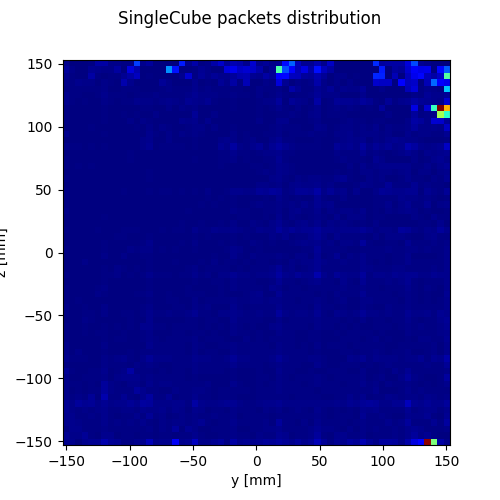

In [37]:
# histogram packet positions
%matplotlib widget
#Range = [[-310, 310],[-620, 620]]
x_bins = 60
y_bins = 60
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, figsize=(5,5))
cmap = plt.cm.jet
# norm = colors.LogNorm(vmin=1e-8,vmax=1e-3)
H1 = axes.hist2d(ys, zs, bins = [x_bins,y_bins],cmap=cmap,density=False)

fig.suptitle(r'SingleCube packets distribution')
axes.set_xlabel('y [mm]')
axes.set_ylabel('z [mm]')
#axes[1].set_ylabel('y [mm]')
#plt.savefig('argon39_candidates_anode_distribution_2021_04_05_01_19_39_2Mto6M_selection_without_cosmics_veto.pdf')